In [1]:
import cv2
from skimage.transform import resize
from os import listdir, walk
from os.path import isfile, join
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K

def gray_reshape(directory, new_size = (28,28), gray =False):
    """
    give the list of photos with the correct pixel size you want to 
    downsize. If you want Gray then write True.
    """
    items_resized  =[]
    pictures = []
    labels = []
    mapping = {'plants' : 0,'coins' : 1,'faces' : 2,'cups' : 3,'glasses' : 4,'pens' : 5,'gestures' : 6,'cutlery' : 7,'plates' : 8, 
                'nail_polishes' : 9  ,'shoes' : 10 
                }
    onlyfolders = [f for f in listdir(directory)]
    for idx, folder in enumerate(onlyfolders[1:]):
        pictures = [f for f in listdir(directory + folder) if isfile(join(directory + folder , f))]
        for idx, picture in enumerate(pictures):
            item = cv2.imread(directory + folder +'/'+ picture )
            labels.append(mapping[folder])
            
            if gray == True:
                item_gray = cv2.cvtColor(item, cv2.COLOR_BGR2GRAY)
                item_resized_gray = resize(item_gray, new_size)
                items_resized.append(item_resized_gray)
            else:
                item_resized_colored = resize(item, new_size)
                items_resized.append(item_resized_colored)
    return items_resized, labels

In [2]:
onlyfolders = [f for f in listdir('../output/')]
onlyfolders

['.DS_Store',
 'plants',
 'coins',
 'glasses',
 'pens',
 'gestures',
 'cutlery',
 'plates',
 'nail_polishes',
 'shoes',
 'cups',
 'faces']

In [3]:
X , y = gray_reshape('../output/', new_size = (160,160), gray =False);

#plt.imshow(X[8],cmap='Greys')
# Model / data parameters
num_classes = len(np.unique(y))
input_shape = (160, 160, 3)
# shuffle the data

shuffler = np.random.permutation(len(X))
X = np.array(X)
y = np.array(y)
X = X[shuffler]
y = y[shuffler]



In [4]:
# the data, split between train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
# Scale images to the [0, 1] range
#### Normalise


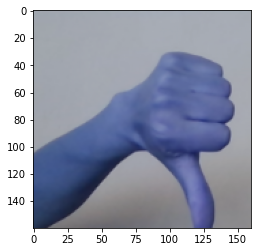

In [5]:
plt.imshow(X_test[45],cmap='Greys')

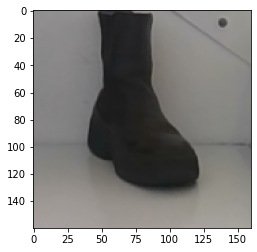

In [6]:
plt.imshow(X[799],cmap='Greys')

In [7]:
# Always always check shapes! 
X_train.shape, X_test.shape

((1042, 160, 160, 3), (184, 160, 160, 3))

In [8]:
x_train = X_train.astype("float32") / 255
x_test = X_test.astype("float32") / 255

# one hot encoder

y_train = keras.utils.to_categorical(y_train, num_classes)

y_test = keras.utils.to_categorical(y_test, num_classes)



In [9]:
# define the keras model.    the kernel size is the window that checks geometries: can be (3,3), (5,5), (7,7)
# Always clear the session!
K.clear_session()
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(5, 5), activation="relu"),   # number of neurons:  must be multiples of 2. good technique to start eith 8 and then we increase in the insede layers.
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.1),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
# model summary table
model.summary()

# define the batch size and number of epochs
batch_size = 5
epochs = 200




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 156, 156, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 78, 78, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 76, 76, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 46208)             0         
                                                                 
 dropout (Dropout)           (None, 46208)             0

2022-05-13 12:18:17.938636: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# complile and define eval metric
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



In [11]:
# fit the model
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience=3)
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/200
188/188 [==============================] - 25s 125ms/step - loss: 2.3053 - accuracy: 0.1836 - val_loss: 2.0778 - val_accuracy: 0.2476
Epoch 2/200
188/188 [==============================] - 23s 123ms/step - loss: 1.9570 - accuracy: 0.3116 - val_loss: 1.4180 - val_accuracy: 0.5048
Epoch 3/200
188/188 [==============================] - 22s 119ms/step - loss: 1.3212 - accuracy: 0.5699 - val_loss: 1.2141 - val_accuracy: 0.5429
Epoch 4/200
188/188 [==============================] - 22s 115ms/step - loss: 1.1073 - accuracy: 0.6371 - val_loss: 1.0767 - val_accuracy: 0.5905
Epoch 5/200
188/188 [==============================] - 21s 113ms/step - loss: 0.9392 - accuracy: 0.6916 - val_loss: 0.9371 - val_accuracy: 0.6857
Epoch 6/200
188/188 [==============================] - 22s 116ms/step - loss: 0.8634 - accuracy: 0.7150 - val_loss: 0.8518 - val_accuracy: 0.7238
Epoch 7/200
188/188 [==============================] - 21s 111ms/step - loss: 0.7527 - accuracy: 0.7407 - val_loss: 0.8133 -

KeyboardInterrupt: 

In [ ]:
model.save("model_MNIST_3.h5")
# here you can stop your notebook
# moons_model = load_model("model_MNIST.h5")
# moons_model.summary()

In [ ]:
##### Load model if needed
from tensorflow.keras.models import load_model
model = load_model("model_MNIST_2.h5")
model.summary()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

print(ynew[1])
print(y_test[1])

In [ ]:
import time
mapping = {'plants' : 0,'coins' : 1,'faces' : 2,'cups' : 3,'glasses' : 4,'pens' : 5,'gestures' : 6,'cutlery' : 7,'plates' : 8, 
             'nail_polishes' : 9  ,'shoes' : 10 
             }
ynew = model.predict(x_test)
# show the inputs and predicted outputs
for idx, value in enumerate(ynew):
    print(f'With {np.max(value)} probability the model predicts that it is a {list(mapping)[np.where(value == np.max(value))[0][0]]}.')#
    print(f'The item is {list(mapping)[np.where(y_test[idx] == np.max(y_test[idx]))[0][0]]}.')
    # plt.imshow(X_test[idx],cmap='Greys')
    # time.sleep(8)

    


# Traain a different model

In [2]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image # Keras own inbuild image class
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Model
from tensorflow import keras

In [5]:
# folder names containing images of the things you want to classify
classes = ['plants' ,'coins' ,'faces' ,'cups','glasses' ,'pens' ,'gestures' ,'cutlery' ,'plates' , 
             'nail_polishes'  ,'shoes']
# plug in the path to your data folder
base_path ='../output/'
# define an image data generator
data_gen = image.ImageDataGenerator(
    # define the preprocessing function that should be applied to all images
    preprocessing_function=preprocess_input  
)
# a generator that returns batches of X and y arrays
train_data_gen = data_gen.flow_from_directory(
        directory=base_path,
        class_mode="categorical",
        classes=classes,
        batch_size=30,
        target_size=(224, 224)
)
# first 30 images , each time you rerun this the next set of 30 images will be displayed
xtrain, ytrain = next(train_data_gen)
xtrain.shape, ytrain.shape

# Transfer learning on MobileNet model
from tensorflow.keras.applications import mobilenet_v2
base_model = mobilenet_v2.MobileNetV2(
    weights='imagenet', 
    alpha=0.35,         # specific parameter of this model, small alpha reduces the number of overall weights
    pooling='avg',      # applies global average pooling to the output of the last conv layer (like a flattening)
    include_top=False,  # !!!!! we only want to have the base, not the final dense layers 
    input_shape=(224, 224, 3)
)

base_model.trainable = False
model = keras.Sequential() # defining a new model
model.add(base_model) # adding in the pretrained model without the fully connected layer
model.add(keras.layers.Dense(len(classes), activation='softmax')) #!!! Final layer with a length of 2, and softmax activation 
# have a look at the trainable and non-trainable params statistic
len(classes)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.categorical_crossentropy,
              metrics=[keras.metrics.categorical_accuracy])

# observe the validation loss and stop when it does not improve after 3 iterations
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

RGB_model_mobilinet = model.fit(xtrain, ytrain, 
          epochs=50, 
          verbose=2,
          batch_size=100, 
          callbacks=[callback],
          # use 30% of the data for validation
          validation_split=0.2)

Found 1226 images belonging to 11 classes.
Epoch 1/50
1/1 - 6s - loss: 2.9021 - categorical_accuracy: 0.0952 - val_loss: 2.4762 - val_categorical_accuracy: 0.2222 - 6s/epoch - 6s/step
Epoch 2/50
1/1 - 1s - loss: 2.0102 - categorical_accuracy: 0.3333 - val_loss: 2.5255 - val_categorical_accuracy: 0.1111 - 1s/epoch - 1s/step
Epoch 3/50
1/1 - 1s - loss: 1.9249 - categorical_accuracy: 0.3333 - val_loss: 2.4880 - val_categorical_accuracy: 0.1111 - 1s/epoch - 1s/step
Epoch 4/50
1/1 - 1s - loss: 1.4225 - categorical_accuracy: 0.5714 - val_loss: 2.4201 - val_categorical_accuracy: 0.1111 - 1s/epoch - 1s/step
Epoch 5/50
1/1 - 1s - loss: 1.2272 - categorical_accuracy: 0.6667 - val_loss: 2.3601 - val_categorical_accuracy: 0.1111 - 1s/epoch - 1s/step
Epoch 6/50
1/1 - 1s - loss: 0.9962 - categorical_accuracy: 0.7143 - val_loss: 2.2896 - val_categorical_accuracy: 0.2222 - 1s/epoch - 1s/step
Epoch 7/50
1/1 - 1s - loss: 0.7798 - categorical_accuracy: 0.7143 - val_loss: 2.2425 - val_categorical_accuracy

In [7]:
RGB_model_mobilinet.summary()

AttributeError: 'History' object has no attribute 'summary'

a,lrgnnjanfjgnaöfngöajfn

In [6]:
import sys
import logging
import os
import cv2
from utils import write_image, key_action, init_cam
from tensorflow.keras.models import load_model
import time
import numpy as np
from tensorflow.keras.preprocessing import image # Keras own inbuild image class
from skimage.transform import resize

In [2]:


# Load model
model = load_model("model_MNIST.h5")

#load classes
mapping = {'plants' : 0,'coins' : 1,'faces' : 2,'cups' : 3,'glasses' : 4,'pens' : 5,'gestures' : 6,'cutlery' : 7,'plates' : 8, 
             'nail_polishes' : 9  ,'shoes' : 10 
             }


2022-05-13 13:00:43.957146: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
if __name__ == "__main__":

    # folder to write images to
    out_folder = sys.argv[1]

    # maybe you need this
    os.environ['KMP_DUPLICATE_LIB_OK']='True'

    logging.getLogger().setLevel(logging.INFO)
   
    # also try out this resolution: 640 x 360
    webcam = init_cam(640, 480)
    key = None

    try:
        # q key not pressed 
        while key != 'q':
            # Capture frame-by-frame
            ret, frame = webcam.read()
            # fliping the image 
            frame = cv2.flip(frame, 1)
   
            # draw a [224x224] rectangle into the frame, leave some space for the black border 
            offset = 2
            width = 224
            x = 160
            y = 120
            cv2.rectangle(img=frame, 
                          pt1=(x-offset,y-offset), 
                          pt2=(x+width+offset, y+width+offset), 
                          color=(0, 0, 0), 
                          thickness=2
            )     
            
            # get key event
            key = key_action()
            if key == 'space':
                # write the image without overlay
                # extract the [224x224] rectangle out of it
                img = frame[y:y+width, x:x+width, :]
                #write_image(out_folder, img) 
                #convert image to array, can also specify datatype
                #print(type(img))
                img = image.img_to_array(img,dtype='uint8')
                item_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                item_resized_gray = resize(item_gray, (160,160))
                image_cam = item_resized_gray.reshape(1,160,160,1)
                ynew = model.predict(image_cam)
                print(ynew)
                # show the inputs and predicted outputs
                for idx, value in enumerate(ynew):
                    print(f'With {np.max(value)} probability the model predicts that it is a {list(mapping)[np.where(value == np.max(value))[0][0]]}.')#

            # disable ugly toolbar
            cv2.namedWindow('frame', flags=cv2.WINDOW_GUI_NORMAL)              
            
            # display the resulting frame
            cv2.imshow('frame', frame)      
    finally:
        # when everything done, release the capture
        logging.info('quit webcam')
        webcam.release() 
        cv2.destroyAllWindows()


INFO:root:start web cam


[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
With 1.0 probability the model predicts that it is a coins.
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
With 1.0 probability the model predicts that it is a coins.
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
With 1.0 probability the model predicts that it is a coins.
